In [1]:
#%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib inline 
from __future__ import division
import os, numpy as np
import matplotlib
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)
import corner
# I changed plotting.py - change to numpy
# om10 changed
import om10
from om10 import plotting

from astropy.table import Table

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Paint the colors

db = om10.DB(catalog='/Users/Jenny/Desktop/om10fork/om10/data/qso_mock.fits')
print db
db.paint(synthetic=True, target='lens')
# put color index column in paint
print db.lenses

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
  LENSID  FLAGTYPE NIMG ZLENS ...       GR              RI              IZ      
--------- -------- ---- ----- ... -------------- --------------- ---------------
    14428        0    2 0.062 ...  0.59576686674  0.277568261457  0.284026944019
    21703        0    2 0.072 ...   0.6074015943  0.280315197395  0.281671699047
    31711        0    2 0.082 ... 0.619862770516  0.279691220889   0.28349506255
 45261779        0    4 1.206 ... 0.453925043997  0.573852829887  0.943807579561
 45585755        0    2  1.21 ... 0.447240072003  0.575841257525  0.937564154559
 45599247        0    4  1.21 ... 0.447240072003  0.575841257525  0.937564154559
 29630335        0    2 0.994 ... 0.716241388012  0.746607269128  0.826566431569
 29679486        0    4 0.996 ... 0.714762091856  0.741830276694  0.831566774883
 29834791        0    2 0.998 ... 0.713266018054   0.73867043695  0.835008901779
 89787343        0    2 1.70

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


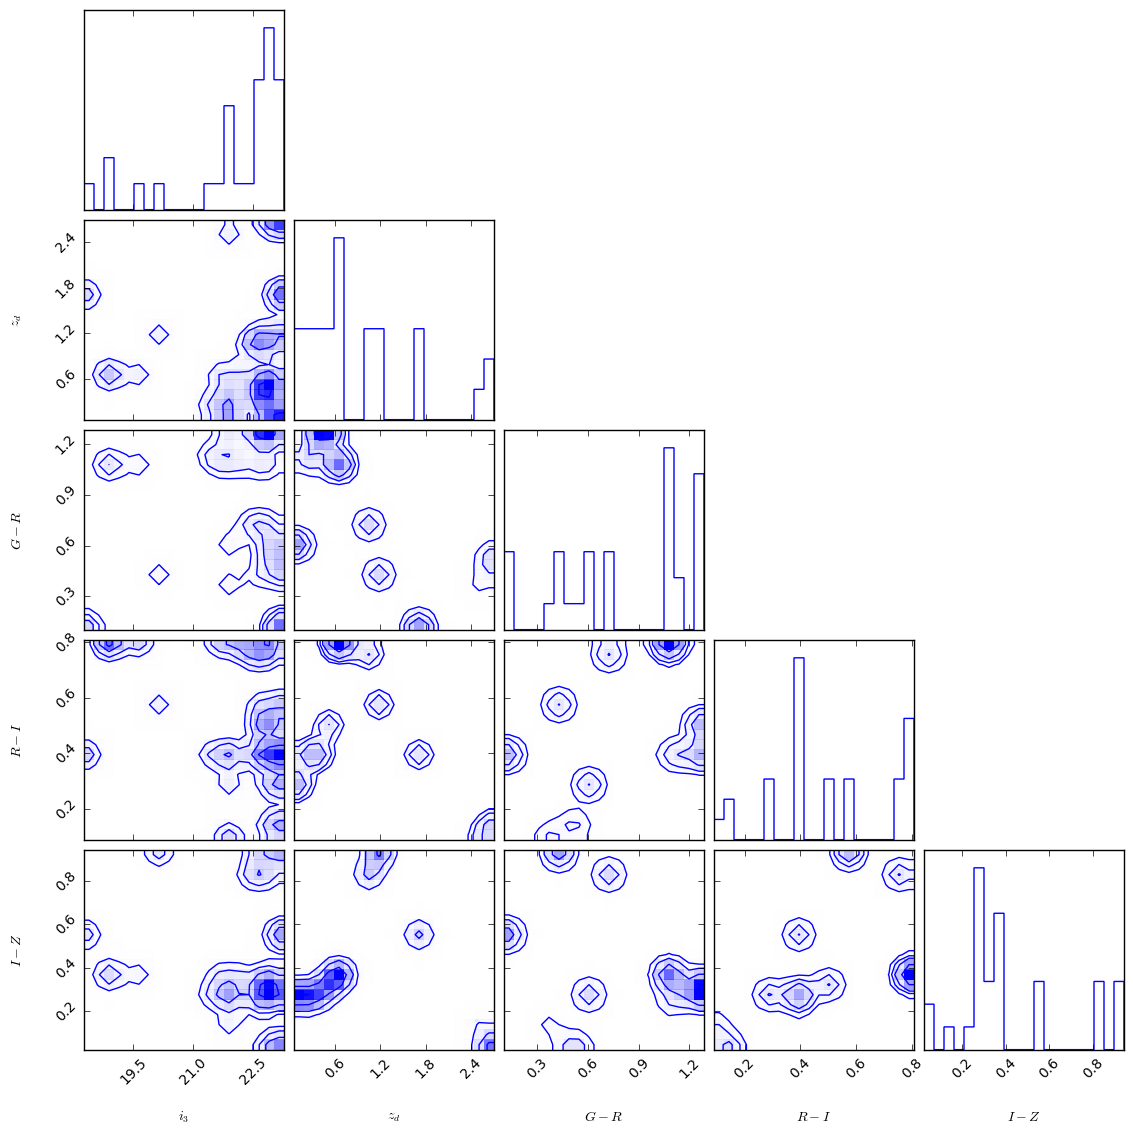

In [3]:
# Draw the cornerplot

# I always had an error related to LaTeX, but this fixes it
matplotlib.rc('text', usetex=False)
fig = om10.plot_sample(db.lenses, color='blue', parameters=('MAGI','ZLENS', 'GR', 'RI', 'IZ'))

In [4]:
# Initialize everything to make a cornerplot
# Rather than changing db.py to enable reading text files I just did in Jupyter

axis_labels = {}
axis_labels['ZLENS'] = '$z_d$'
axis_labels['MAGI'] = '$i_3$'
axis_labels['GR'] = '$G-R$'
axis_labels['RI'] = '$R-I$'
axis_labels['IZ'] = '$I-Z$'

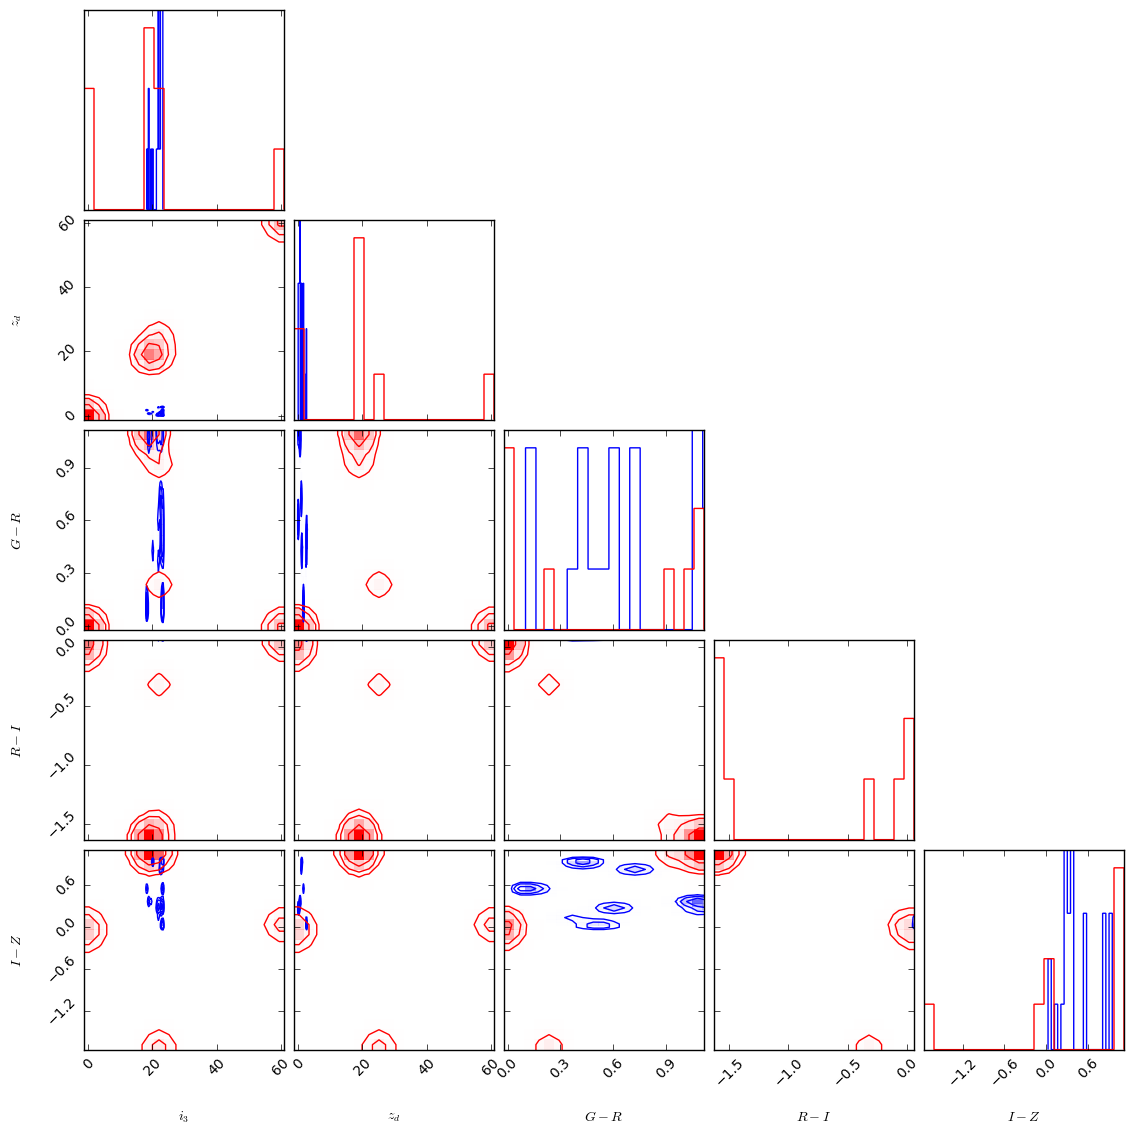

In [5]:
# load the "real" values
# ra  dec  z  mag_u  mag_g  mag_r  mag_i  mag_z
table = np.loadtxt('../data/SDSS_LRGs.txt')

z = table[2]
i = table[7]
gr = table[5]-table[6]
ri = table[6]-table[7]
iz = table[7]-table[8]

data = Table({'MAGI': i, 'ZLENS': z, 'GR': gr, 'RI': ri, 'IZ': iz}, names=['MAGI', 'ZLENS', 'GR', 'RI', 'IZ'])
features, labels = plotting.extract_features(data, ('MAGI','ZLENS', 'GR', 'RI', 'IZ'))
corner.corner(features, labels=labels, color='red', smooth=1.0, fig=fig)